In [2]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt


In [40]:

# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_crew/S3_SHD_runs/0lxc706a'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

sweep_params = ['lr','nb_state','normalization','activation','pure_complex','use_readout_layer']

In [41]:
runs

<Runs maximes_crew/S3_SHD_runs>

In [42]:
# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    n_layers = config.get('nb_layers')
    n_hiddens = config.get('nb_hiddens')
    lr = config.get('lr')
    dt_min = config.get('dt_min')
    dt_max = config.get('dt_max')
    pdrop = config.get('pdrop')
    sched_patience = config.get('scheduler_patience')
    sched_factor = config.get('scheduler_factor')
    best_valid_acc = summary.get('best valid acc')
    s4 = config.get('s4')
    normalization = config.get('normalization')
    use_readout_layer = config.get('use_readout_layer')
    nb_state = config.get('nb_state')
    pure_complex = config.get('pure_complex')
    activation = config.get('activation')


    if best_valid_acc is not None:
        data.append({
            'n_layers': n_layers,
            'n_hiddens': n_hiddens,
            's4':s4,
            'normalization':normalization,
            'use_readout_layer':use_readout_layer,
            'nb_state':nb_state,
            'pure_complex':pure_complex,
            'activation':activation,
            'lr': lr,
            'dt_min': dt_min,
            'dt_max': dt_max,
            'pdrop' : pdrop,
            'scheduler_patience' : sched_patience,
            'scheduler_factor' : sched_factor,
            'best_valid_acc': best_valid_acc
        })



In [43]:
data

[{'n_layers': 3,
  'n_hiddens': 128,
  's4': True,
  'normalization': 'layernorm',
  'use_readout_layer': False,
  'nb_state': 128,
  'pure_complex': True,
  'activation': 'GELU',
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 0.7,
  'pdrop': 0.1,
  'scheduler_patience': 10,
  'scheduler_factor': 0.7,
  'best_valid_acc': 0.9181265782828284},
 {'n_layers': 3,
  'n_hiddens': 128,
  's4': True,
  'normalization': 'layernorm',
  'use_readout_layer': True,
  'nb_state': 128,
  'pure_complex': True,
  'activation': 'GELU',
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 0.7,
  'pdrop': 0.1,
  'scheduler_patience': 10,
  'scheduler_factor': 0.7,
  'best_valid_acc': 0.9352114898989898},
 {'n_layers': 3,
  'n_hiddens': 128,
  's4': True,
  'normalization': 'layernorm',
  'use_readout_layer': False,
  'nb_state': 128,
  'pure_complex': True,
  'activation': 'GELU',
  'lr': 0.005,
  'dt_min': 0.01,
  'dt_max': 0.7,
  'pdrop': 0.1,
  'scheduler_patience': 10,
  'scheduler_factor': 0.7,
  'best_valid_ac

In [44]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Group by the sweep parameters and compute the mean of best_valid_acc for each group
df_grouped = df.groupby(sweep_params).agg({'best_valid_acc': 'mean'}).reset_index()

# Calculate the number of runs for each configuration
df['run_count'] = df.groupby(sweep_params)['best_valid_acc'].transform('size')

# Add the run count to the grouped DataFrame
df_grouped = df_grouped.merge(df[sweep_params + ['run_count']].drop_duplicates(), on=sweep_params, how='left')

# Sort by best_valid_acc in descending order
df_grouped_sorted = df_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
df_grouped_sorted

,lr,nb_state,normalization,activation,pure_complex,use_readout_layer,best_valid_acc,run_count
0,0.010,6,batchnorm,GELU,False,True,0.950908,5
1,0.005,32,batchnorm,GELU,True,True,0.946930,5
2,0.005,4,batchnorm,GELU,True,True,0.946330,5
3,0.005,6,batchnorm,GELU,True,True,0.946117,5
4,0.010,4,batchnorm,GELU,True,True,0.945802,5
...,...,...,...,...,...,...,...,...
187,0.005,6,layernorm,step,False,False,0.859478,5
188,0.010,4,layernorm,step,False,False,0.856810,5
189,0.005,4,layernorm,step,False,False,0.851199,5
190,0.010,2,layernorm,step,False,False,0.845376,5


In [53]:
import pandas as pd

# Assuming df is already defined and contains the necessary columns

# Define the sweep parameters excluding 'activation'
sweep_params = ['lr', 'nb_state', 'normalization', 'pure_complex', 'use_readout_layer']

# Filter the DataFrame by activation function
df_gelu = df[df['activation'] == 'GELU']
df_step = df[df['activation'] == 'step']

# Group by the sweep parameters and compute the mean of best_valid_acc for each group
df_gelu_grouped = df_gelu.groupby(sweep_params).agg({'best_valid_acc': 'mean'}).reset_index()
df_step_grouped = df_step.groupby(sweep_params).agg({'best_valid_acc': 'mean'}).reset_index()

# Add the activation column for comparison
df_gelu_grouped['activation'] = 'GELU'
df_step_grouped['activation'] = 'step'

# Merge the two DataFrames to compare GELU and step side-by-side
df_comparison = pd.merge(df_gelu_grouped, df_step_grouped, on=sweep_params, suffixes=('_gelu', '_step'), how='inner')

# Optionally, sort by best_valid_acc_gelu to see the best performing configurations with GELU
df_comparison_sorted = df_comparison.sort_values(by='best_valid_acc_gelu', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(df_comparison_sorted)

# Compute the difference between GELU and step validation accuracies
df_comparison['acc_diff'] = df_comparison['best_valid_acc_gelu'] - df_comparison['best_valid_acc_step']

# Filter configurations where step has higher validation accuracy (i.e., negative differences)
df_negative_diff = df_comparison[df_comparison['acc_diff'] < 0]

# Print the configurations where step has higher validation accuracy
if not df_negative_diff.empty:
    print("Configurations where step has higher validation accuracy:")
    print(df_negative_diff[['lr', 'nb_state', 'normalization', 'pure_complex', 'use_readout_layer', 'acc_diff']])
else:
    print("GELU is always better than step")

# Compute the average of positive differences where GELU has higher validation accuracy
df_positive_diff = df_comparison[df_comparison['acc_diff'] > 0]
average_positive_diff = df_positive_diff['acc_diff'].mean()

# Print the average of positive differences
print(f"Average positive difference (GELU - step): {average_positive_diff}")



       lr  nb_state normalization  pure_complex  use_readout_layer  \
0   0.010         6     batchnorm         False               True   
1   0.005        32     batchnorm          True               True   
2   0.005         4     batchnorm          True               True   
3   0.005         6     batchnorm          True               True   
4   0.010         4     batchnorm          True               True   
..    ...       ...           ...           ...                ...   
91  0.005       128     layernorm         False              False   
92  0.010         4     layernorm         False              False   
93  0.005         4     layernorm         False              False   
94  0.010         2     layernorm         False              False   
95  0.005         2     layernorm         False              False   

    best_valid_acc_gelu activation_gelu  best_valid_acc_step activation_step  
0              0.950908            GELU             0.925418            step  
1

In [55]:
df_grouped_sorted[0:10]


,lr,nb_state,normalization,pure_complex,use_readout_layer,best_valid_acc,activation
0,0.005,2,batchnorm,False,False,0.885322,step
1,0.005,2,batchnorm,False,True,0.911182,step
2,0.005,2,batchnorm,True,False,0.903472,step
3,0.005,2,batchnorm,True,True,0.919792,step
4,0.005,2,layernorm,False,False,0.842787,step
5,0.005,2,layernorm,False,True,0.878851,step
6,0.005,2,layernorm,True,False,0.873074,step
7,0.005,2,layernorm,True,True,0.885969,step
8,0.005,4,batchnorm,False,False,0.884462,step
9,0.005,4,batchnorm,False,True,0.916769,step


In [63]:
df_step_grouped_sorted = df_step_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)
df_gelu_grouped_sorted = df_gelu_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)

df_step_grouped_sorted[0:10]

,lr,nb_state,normalization,pure_complex,use_readout_layer,best_valid_acc,activation
0,0.010,6,batchnorm,True,True,0.934209,step
1,0.010,64,batchnorm,True,True,0.931834,step
2,0.005,6,batchnorm,True,True,0.931321,step
3,0.005,64,batchnorm,True,True,0.930429,step
4,0.005,32,batchnorm,True,True,0.930114,step
5,0.010,128,batchnorm,True,True,0.930106,step
6,0.005,128,batchnorm,True,True,0.929459,step
7,0.010,128,batchnorm,False,True,0.929143,step
8,0.010,32,batchnorm,False,True,0.928520,step
9,0.010,32,batchnorm,True,True,0.927541,step


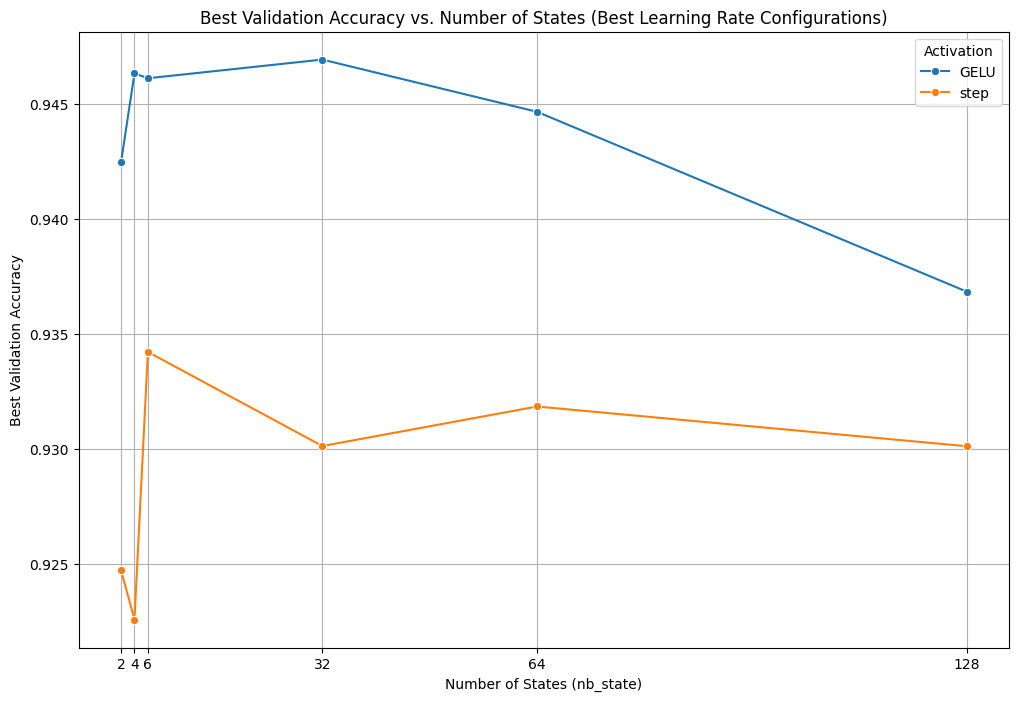

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame based on criteria for step activation
filtered_df_step = df_step_grouped_sorted[
    (df_step_grouped_sorted['normalization'] == 'batchnorm') &
    (df_step_grouped_sorted['pure_complex'] == True) &
    (df_step_grouped_sorted['use_readout_layer'] == True)
].copy()

# Filter the DataFrame based on criteria for GELU activation
filtered_df_gelu = df_gelu_grouped_sorted[
    (df_gelu_grouped_sorted['normalization'] == 'batchnorm') &
    (df_gelu_grouped_sorted['pure_complex'] == True) &
    (df_gelu_grouped_sorted['use_readout_layer'] == True)
].copy()

# Add a column to distinguish between activation types
filtered_df_step['activation'] = 'step'
filtered_df_gelu['activation'] = 'GELU'

# Combine the filtered DataFrames for both activations
combined_df = pd.concat([filtered_df_step, filtered_df_gelu], ignore_index=True)

# Find the best learning rate for each configuration
best_lr_df = combined_df.loc[combined_df.groupby(
    ['nb_state', 'normalization', 'pure_complex', 'use_readout_layer', 'activation']
)['best_valid_acc'].idxmax()]

# Plot best_valid_acc against nb_state for the best learning rate configurations
plt.figure(figsize=(12, 8))
sns.lineplot(data=best_lr_df, x='nb_state', y='best_valid_acc', hue='activation', marker='o')

# Set exact nb_state values on the x-axis
unique_nb_states = sorted(best_lr_df['nb_state'].unique())
plt.xticks(ticks=unique_nb_states, labels=unique_nb_states)

# Customize the plot
plt.title('Best Validation Accuracy vs. Number of States (Best Learning Rate Configurations)')
plt.xlabel('Number of States (nb_state)')
plt.ylabel('Best Validation Accuracy')
plt.legend(title='Activation')
plt.grid(True)
plt.show()


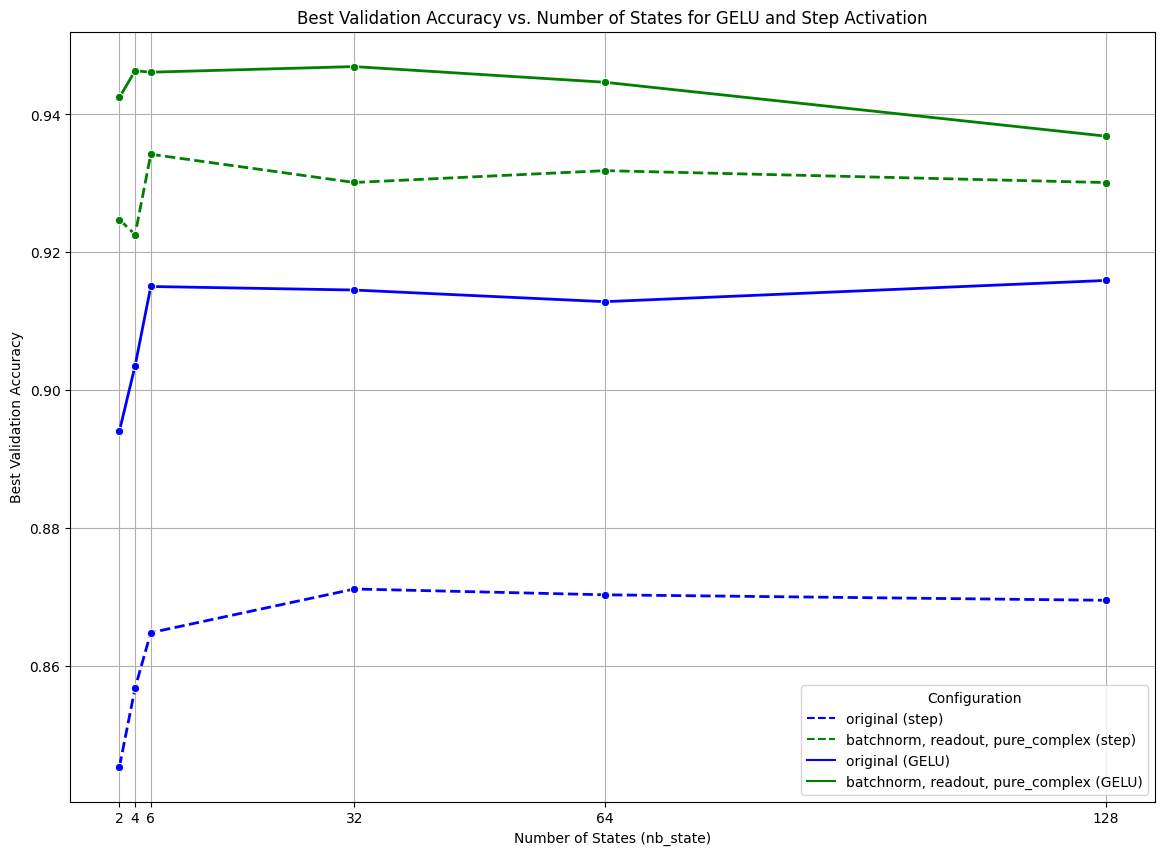

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines


# Filter df_step_grouped_sorted for the two specific configurations
# Configuration 1: use_readout = False, pure_complex = False, normalization = layernorm
config1_step = df_step_grouped_sorted[
    (df_step_grouped_sorted['use_readout_layer'] == False) &
    (df_step_grouped_sorted['pure_complex'] == False) &
    (df_step_grouped_sorted['normalization'] == 'layernorm')
].copy()

# Configuration 2: use_readout = True, pure_complex = True, normalization = batchnorm
config2_step = df_step_grouped_sorted[
    (df_step_grouped_sorted['use_readout_layer'] == True) &
    (df_step_grouped_sorted['pure_complex'] == True) &
    (df_step_grouped_sorted['normalization'] == 'batchnorm')
].copy()

# Find the best learning rate for each configuration
best_lr_config1_step = config1_step.loc[config1_step.groupby(
    ['nb_state', 'activation', 'pure_complex', 'use_readout_layer', 'normalization']
)['best_valid_acc'].idxmax()]

best_lr_config2_step = config2_step.loc[config2_step.groupby(
    ['nb_state', 'activation', 'pure_complex', 'use_readout_layer', 'normalization']
)['best_valid_acc'].idxmax()]

# Add a column to distinguish between configurations
best_lr_config1_step['configuration'] = 'original (step)'
best_lr_config2_step['configuration'] = 'batchnorm, readout, pure_complex (step)'

# Combine the DataFrames for step activation
combined_df_step = pd.concat([best_lr_config1_step, best_lr_config2_step], ignore_index=True)

# Add GELU configurations to combined_df_step for comparison
best_lr_config1_gelu = best_lr_config1.copy()
best_lr_config2_gelu = best_lr_config2.copy()

best_lr_config1_gelu['configuration'] = 'original (GELU)'
best_lr_config2_gelu['configuration'] = 'batchnorm, readout, pure_complex (GELU)'

# Combine GELU and step DataFrames
combined_df = pd.concat([combined_df_step, best_lr_config1_gelu, best_lr_config2_gelu], ignore_index=True)

# Define color and style for each configuration
palette = {
    'original (step)': 'blue',
    'batchnorm, readout, pure_complex (step)': 'green',
    'original (GELU)': 'blue',
    'batchnorm, readout, pure_complex (GELU)': 'green'
}

# Plot best_valid_acc against nb_state for the best learning rate configurations
plt.figure(figsize=(14, 10))
ax = sns.lineplot(data=combined_df, x='nb_state', y='best_valid_acc', hue='configuration', 
             palette=palette, marker='o', linewidth=2)

# Manually set line styles for different configurations
ax.lines[0].set_linestyle("--")  # Dashed for 'original (step)'
ax.lines[1].set_linestyle("--")  # Dashed for 'batchnorm, readout, pure_complex (step)'

# Set exact nb_state values on the x-axis
unique_nb_states = sorted(combined_df['nb_state'].unique())
plt.xticks(ticks=unique_nb_states, labels=unique_nb_states)

# Create custom legend entries with correct line styles
legend_lines = [
    mlines.Line2D([], [], color='blue', linestyle='--', label='original (step)'),
    mlines.Line2D([], [], color='green', linestyle='--', label='batchnorm, readout, pure_complex (step)'),
    mlines.Line2D([], [], color='blue', linestyle='-',  label='original (GELU)'),
    mlines.Line2D([], [], color='green', linestyle='-',  label='batchnorm, readout, pure_complex (GELU)')
]

# Customize the plot
plt.title('Best Validation Accuracy vs. Number of States for GELU and Step Activation')
plt.xlabel('Number of States (nb_state)')
plt.ylabel('Best Validation Accuracy')
plt.grid(True)

# Add the custom legend
plt.legend(handles=legend_lines, title='Configuration')

plt.show()

Hidden

In [3]:


# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_crew/S3_SHD_runs/pj1sj9r0'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

sweep_params = ['nb_state','nb_hiddens','normalization','pure_complex','use_readout_layer']

# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    n_layers = config.get('nb_layers')
    nb_hiddens = config.get('nb_hiddens')
    lr = config.get('lr')
    dt_min = config.get('dt_min')
    dt_max = config.get('dt_max')
    pdrop = config.get('pdrop')
    sched_patience = config.get('scheduler_patience')
    sched_factor = config.get('scheduler_factor')
    best_valid_acc = summary.get('best valid acc')
    s4 = config.get('s4')
    normalization = config.get('normalization')
    use_readout_layer = config.get('use_readout_layer')
    nb_state = config.get('nb_state')
    pure_complex = config.get('pure_complex')
    activation = config.get('activation')


    if best_valid_acc is not None:
        data.append({
            'n_layers': n_layers,
            'nb_hiddens': nb_hiddens,
            's4':s4,
            'normalization':normalization,
            'use_readout_layer':use_readout_layer,
            'nb_state':nb_state,
            'pure_complex':pure_complex,
            'activation':activation,
            'lr': lr,
            'dt_min': dt_min,
            'dt_max': dt_max,
            'pdrop' : pdrop,
            'scheduler_patience' : sched_patience,
            'scheduler_factor' : sched_factor,
            'best_valid_acc': best_valid_acc
        })



In [4]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Group by the sweep parameters and compute the mean of best_valid_acc for each group
df_grouped = df.groupby(sweep_params).agg({'best_valid_acc': 'mean'}).reset_index()

# Calculate the number of runs for each configuration
df['run_count'] = df.groupby(sweep_params)['best_valid_acc'].transform('size')

# Add the run count to the grouped DataFrame
df_grouped = df_grouped.merge(df[sweep_params + ['run_count']].drop_duplicates(), on=sweep_params, how='left')

# Sort by best_valid_acc in descending order
df_grouped_sorted = df_grouped.sort_values(by='best_valid_acc', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
df_grouped_sorted

,nb_state,nb_hiddens,normalization,pure_complex,use_readout_layer,best_valid_acc,run_count
0,6,256,batchnorm,True,True,0.940522,5
1,32,256,batchnorm,True,True,0.939860,5
2,6,128,batchnorm,True,True,0.937334,5
3,128,256,batchnorm,True,True,0.937303,5
4,4,256,batchnorm,True,True,0.936379,5
...,...,...,...,...,...,...,...
115,2,64,batchnorm,False,False,0.879861,5
116,32,1024,batchnorm,False,True,0.857008,5
117,6,1024,batchnorm,False,True,0.807378,5
118,4,1024,batchnorm,False,True,0.790475,5
